In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
metro_interstate_traffic_volume = fetch_ucirepo(id=492)

# data (as pandas dataframes)
X = metro_interstate_traffic_volume.data.features
y = metro_interstate_traffic_volume.data.targets

# metadata
print(metro_interstate_traffic_volume.metadata)

# variable information
print(metro_interstate_traffic_volume.variables)


{'uci_id': 492, 'name': 'Metro Interstate Traffic Volume', 'repository_url': 'https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume', 'data_url': 'https://archive.ics.uci.edu/static/public/492/data.csv', 'abstract': 'Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 48204, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['traffic_volume'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5X60B', 'creators': ['John Hogue'], 'intro_paper': None, 'additional_info': {'summary': 'Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weath

# 1) تثبيت وتحميل البيانات
# تحميل مجموعة بيانات UCI بالمعرف 492
# دمج الميزات مع الهدف
# فحص أولي


In [3]:
!pip -q install ucimlrepo seaborn plotly

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

uci = fetch_ucirepo(id=492)
X = uci.data.features
y = uci.data.targets

df = pd.concat([X, y], axis=1)

display(df.head())
display(df.info())
display(df.describe(include='all'))


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


None

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-04-18 22:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


# 2) إحصاءات أساسية للهدف


In [4]:
tv = df['traffic_volume']
mean_tv = tv.mean()
median_tv = tv.median()
mode_tv = tv.mode().iloc[0] if not tv.mode().empty else np.nan
std_tv = tv.std()
rng_tv = tv.max() - tv.min()

summary_basic = {
    'mean': mean_tv,
    'median': median_tv,
    'mode': mode_tv,
    'std': std_tv,
    'range': rng_tv,
    'min': tv.min(),
    'max': tv.max()
}
summary_basic


{'mean': np.float64(3259.8183553232097),
 'median': 3380.0,
 'mode': np.int64(353),
 'std': 1986.8606704463552,
 'range': 7280,
 'min': 0,
 'max': 7280}

# 3) الالتواء والحدبة


In [5]:
skew_tv = tv.skew()
kurt_tv = tv.kurtosis()

{'skewness': skew_tv, 'kurtosis_fisher': kurt_tv}


{'skewness': np.float64(-0.08938135143647916),
 'kurtosis_fisher': np.float64(-1.3090882117269556)}

# 4) تجميع حسب weather_main


In [6]:
grp_weather = df.groupby('weather_main')['traffic_volume'].agg(['mean','std','count']).sort_values('mean', ascending=False)
top_mean = grp_weather['mean'].idxmax()
top_std = grp_weather['std'].idxmax()
grp_weather.head(10), {'highest_mean_weather': top_mean, 'highest_std_weather': top_std}


(                     mean          std  count
 weather_main                                 
 Clouds        3618.449749  1906.202879  15164
 Haze          3502.101471  1873.511057   1360
 Rain          3317.905501  1982.228705   5672
 Drizzle       3290.727073  1997.901830   1821
 Smoke         3237.650000  1978.015893     20
 Clear         3055.908819  1987.101411  13391
 Snow          3016.844228  1900.185883   2876
 Thunderstorm  3001.620890  1988.296012   1034
 Mist          2932.956639  2073.025670   5950
 Fog           2703.720395  2125.525863    912,
 {'highest_mean_weather': 'Clouds', 'highest_std_weather': 'Fog'})

# 5) هيستوغرام مع متوسط


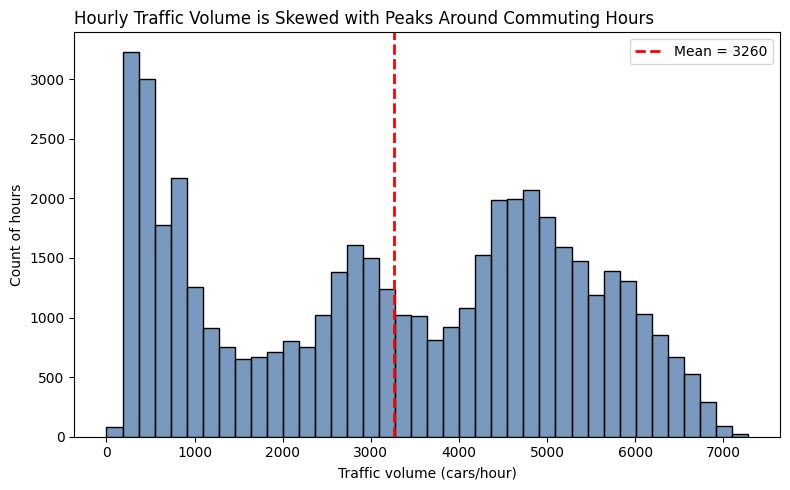

In [7]:
plt.figure(figsize=(8,5))
ax = sns.histplot(tv, bins=40, kde=False, color='#4c78a8')
plt.axvline(mean_tv, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_tv:.0f}")
plt.title("Hourly Traffic Volume is Skewed with Peaks Around Commuting Hours", loc='left')
plt.xlabel("Traffic volume (cars/hour)")
plt.ylabel("Count of hours")
plt.legend()
plt.tight_layout()
plt.show()


# 6) BOX PLOT IQR


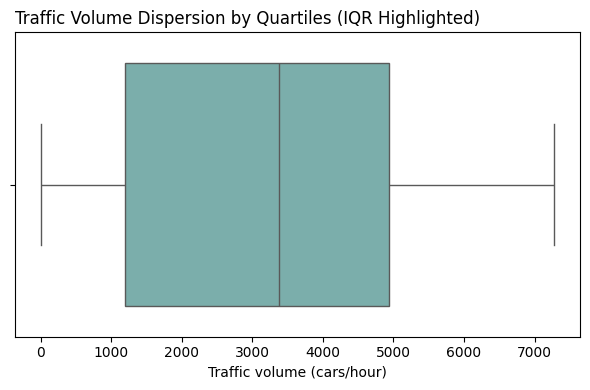

{'Q1': 1193.0, 'Median(Q2)': 3380.0, 'Q3': 4933.0, 'IQR': 3740.0}

In [8]:
q1, q2, q3 = tv.quantile([0.25, 0.5, 0.75])
iqr = q3 - q1

plt.figure(figsize=(6,4))
sns.boxplot(x=tv, color='#72b7b2')
plt.title("Traffic Volume Dispersion by Quartiles (IQR Highlighted)", loc='left')
plt.xlabel("Traffic volume (cars/hour)")
plt.tight_layout()
plt.show()

{'Q1': q1, 'Median(Q2)': q2, 'Q3': q3, 'IQR': iqr}


# 7) صندوقيات مجمعة حسب العطلة


/tmp/ipython-input-2932046056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='holiday', y='traffic_volume', palette=['#4c78a8','#f58518','#72b7b2','#e45756','#54a24b','#b279a2'])
/tmp/ipython-input-2932046056.py:2: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='holiday', y='traffic_volume', palette=['#4c78a8','#f58518','#72b7b2','#e45756','#54a24b','#b279a2'])


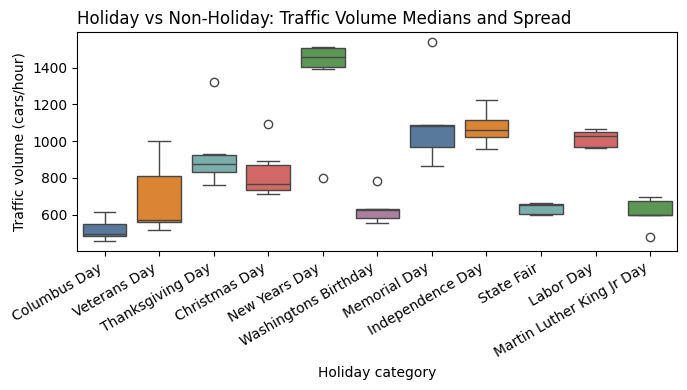

In [9]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='holiday', y='traffic_volume', palette=['#4c78a8','#f58518','#72b7b2','#e45756','#54a24b','#b279a2'])
plt.title("Holiday vs Non-Holiday: Traffic Volume Medians and Spread", loc='left')
plt.xlabel("Holiday category")
plt.ylabel("Traffic volume (cars/hour)")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


# 8) مصفوفة ارتباط وخريطة حرارية


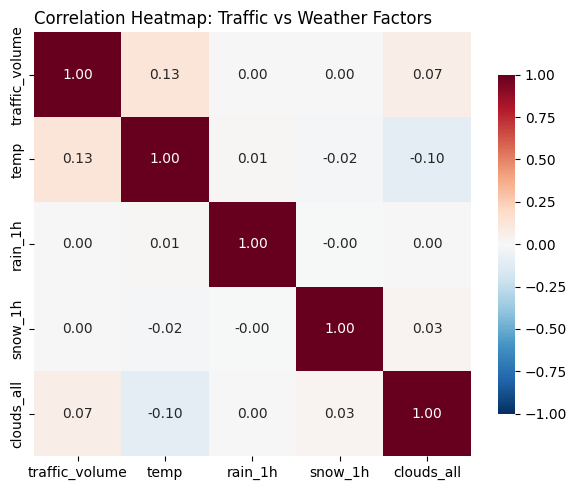

,traffic_volume
temp,0.130299
clouds_all,0.067054
rain_1h,0.004714


In [10]:
num_cols = ['traffic_volume','temp','rain_1h','snow_1h','clouds_all']
corr = df[num_cols].corr(method='pearson')

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0, fmt='.2f', vmin=-1, vmax=1,
            cbar_kws={'shrink':0.8})
plt.title("Correlation Heatmap: Traffic vs Weather Factors", loc='left')
plt.tight_layout()
plt.show()

corr['traffic_volume'].drop('traffic_volume').abs().sort_values(ascending=False).head(3)


# 9) رسم تفاعلي: temp vs traffic_volume


In [11]:
fig = px.scatter(
    df.sample(min(10000, len(df))),  # تقليل نقاط العرض للتفاعل السلس
    x='temp', y='traffic_volume',
    color='weather_main',
    hover_data=['date_time','weather_description','holiday'],
    title="Traffic Volume Tends to Dip in Extreme Temperatures, Regardless of Rain/Snow"
)
fig.update_layout(xaxis_title="Temperature (Kelvin)", yaxis_title="Traffic volume (cars/hour)")
fig.show()
